# Image Preprocessing

This Notebook performs various opprations on the images to make them more suitable for the model.

In [1]:
import numpy as np
import os
import PIL
import PIL.Image as Image
import tensorflow as tf
import tensorflow_datasets as tfds
import pathlib
import matplotlib.pyplot as plt

## Path to the folder containing the images

In [2]:
DATASET_PATH = "/Users/vineetmahajan/Code/AI/datasets/Rock-Paper-Scissors/"
ORIGINAL_DATASET_PATH = DATASET_PATH + "original/"

In [3]:
TRAIN_PATH = ORIGINAL_DATASET_PATH + "train/"
TEST_PATH = ORIGINAL_DATASET_PATH + "test/"
VALIDATION_PATH = ORIGINAL_DATASET_PATH + "validation/"

In [4]:
IMAGE_SIZES = [
    (256, 256),
    (128, 128),
    (96, 96),
    (64, 64),
    (32, 32),
]
SEED = 42


In [5]:
def get_dataset_confs():
    """
    Returns a list of dicts with all possible configurations for the dataset.
    """
    dataset_confs = []
    for image_size in IMAGE_SIZES:
            dataset_confs.append(
                {
                    "image_size": image_size,
                    "seed": SEED,
                }
            )
    return dataset_confs

In [6]:
confs = get_dataset_confs()
len(confs)

5

Found 2520 files belonging to 3 classes.
Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2022-06-04 19:32:09.604059: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-06-04 19:32:09.604234: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-06-04 19:32:09.742408: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Found 2520 files belonging to 3 classes.
Found 2520 files belonging to 3 classes.
Found 2520 files belonging to 3 classes.
Found 2520 files belonging to 3 classes.


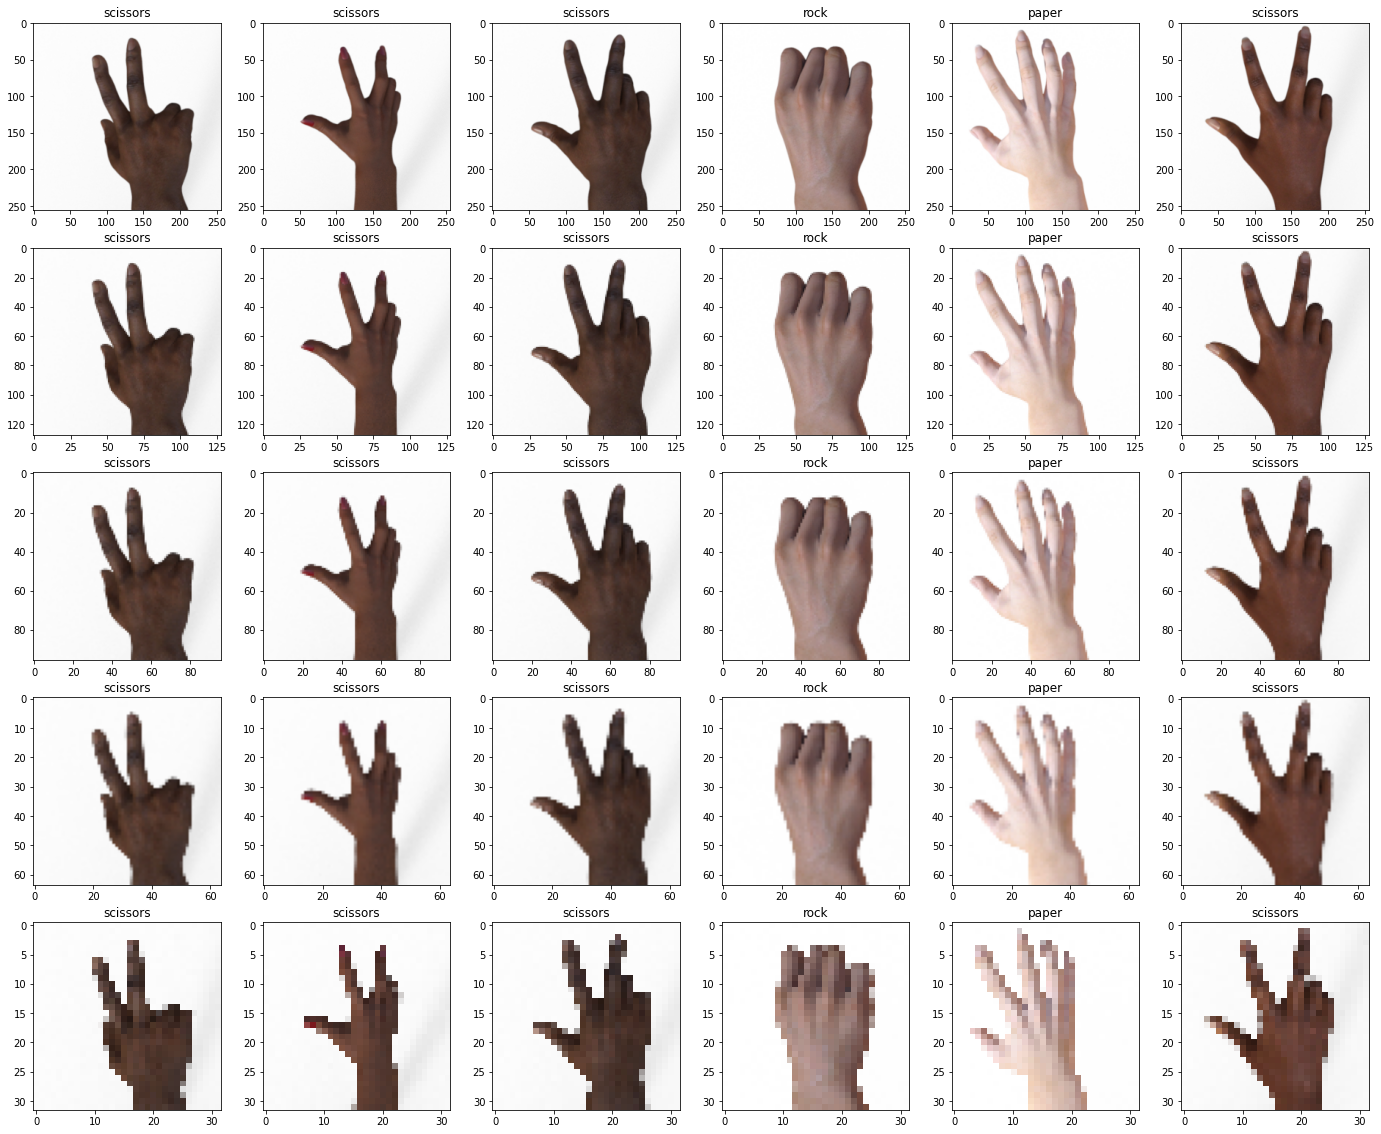

In [7]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

imgs_num = 6
img_size = 3
classes = ['paper', 'rock', 'scissors']

plt.figure(figsize=(imgs_num*4 , len(confs) * 4))
for i_conf, conf in enumerate(confs):
    batch = image_dataset_from_directory(TRAIN_PATH, **conf).take(1)
    for i in range(imgs_num):
        # row title
        for images, labels in batch:
            plt.subplot(len(confs), imgs_num, i_conf * imgs_num + i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(classes[labels[i].numpy()])
            

### We'll be choosing image of size 64x64 and 96x96 for training...
32x32 seems a bit blurry.<br>
128x128 seems to be redundant.<br>

Found 2520 files belonging to 3 classes.
Found 2520 files belonging to 3 classes.
Found 2520 files belonging to 3 classes.


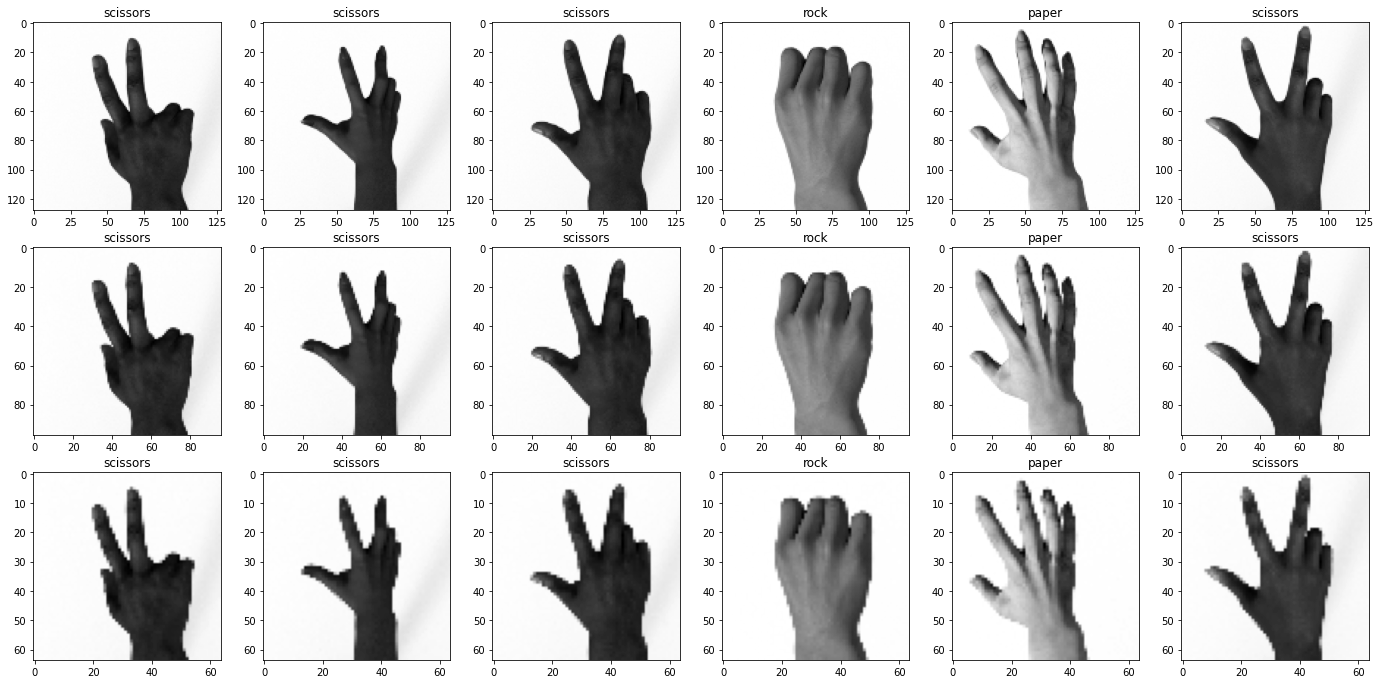

In [10]:
plt.figure(figsize=(imgs_num*4 , len(confs) * 4))
for i_conf, conf in enumerate(confs[1:-1]):
    batch = image_dataset_from_directory(TRAIN_PATH, **conf, color_mode="grayscale").take(1)
    for i in range(imgs_num):
        # row title
        for images, labels in batch:
            plt.subplot(len(confs), imgs_num, i_conf * imgs_num + i + 1)
            plt.imshow(images[i].numpy().astype("uint8"), cmap="gray")
            plt.title(classes[labels[i].numpy()])
            

### We'll also test the results with Grayscale images of size 64x64 and 96x96 and 128x128.